In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Exploratory Data Analysis

In [5]:
df = pd.read_csv('menu.csv')  
print("Primeiras linhas do dataset:")
print(df.head())

Primeiras linhas do dataset:
    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  C

In [ ]:
print("\nValores nulos por coluna:")
print(df.isnull().sum())


Valores nulos por coluna:
Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64


In [11]:
print("\nValores duplicados:")
print(df.duplicated().sum())


Valores duplicados:
0


In [12]:
print("\nEstatísticas descritivas:")
print(df.describe())


Estatísticas descritivas:
          Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.203846    54.942308   
std         

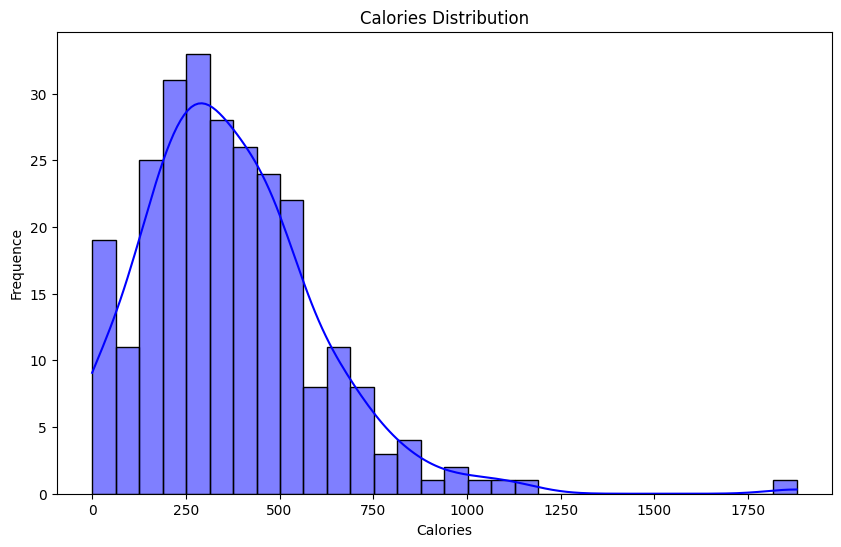

In [ ]:
# Exploratory histogram regarding calories distribution.
plt.figure(figsize=(10, 6))
sns.histplot(df['Calories'], kde=True, bins=30, color='blue')
plt.title('Calories Distribution')
plt.xlabel('Calories')
plt.ylabel('Frequence')
plt.show()

The calories are mostly between 150 and 500 kcal.

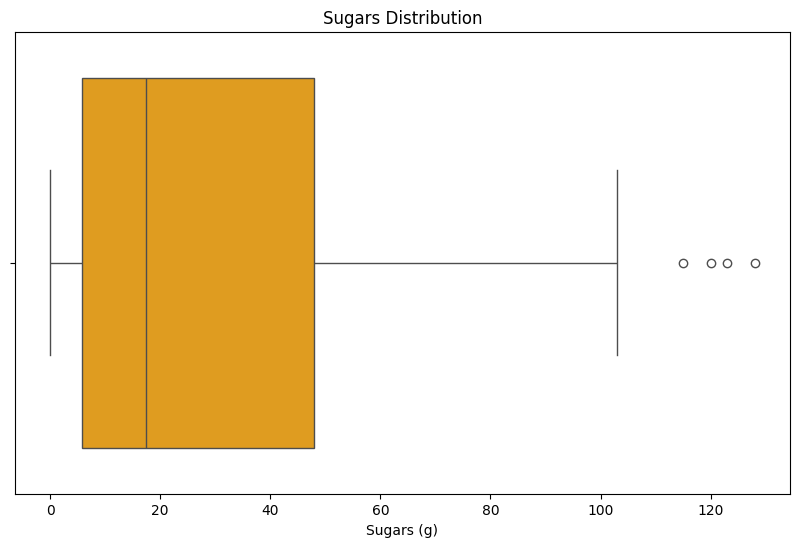

In [7]:
# Exploratory boxplot regarding Sugars Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sugars'], color='orange')
plt.title('Sugars Distribution')
plt.xlabel('Sugars (g)')
plt.show()

The sugars distribution is pretty uniform. We do have some outliers bigger than 100g of Sugars, which is an alarming level.

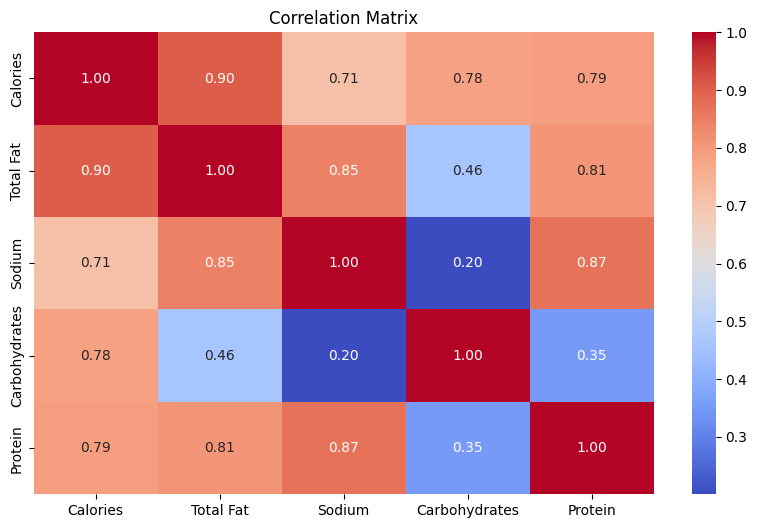

In [8]:
plt.figure(figsize=(10, 6))
corr = df[['Calories', 'Total Fat', 'Sodium', 'Carbohydrates', 'Protein']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## 2.Analysis by Category


In [9]:
average_category= df.groupby('Category').mean(numeric_only=True)

In [10]:
print("Averages per Category:")
print(average_category)

Averages per Category:
                      Calories  Calories from Fat  Total Fat  \
Category                                                       
Beef & Pork         494.000000         224.666667  24.866667   
Beverages           113.703704           0.740741   0.092593   
Breakfast           526.666667         248.928571  27.690476   
Chicken & Fish      552.962963         242.222222  26.962963   
Coffee & Tea        283.894737          71.105263   8.021053   
Desserts            222.142857          64.285714   7.357143   
Salads              270.000000         108.333333  11.750000   
Smoothies & Shakes  531.428571         127.678571  14.125000   
Snacks & Sides      245.769231          94.615385  10.538462   

                    Total Fat (% Daily Value)  Saturated Fat  \
Category                                                       
Beef & Pork                         38.600000      10.466667   
Beverages                            0.148148       0.055556   
Breakfast       

In [ ]:
# Finding the highest calories foods
calories_by_category = average_category['Calories'].sort_values(ascending=False)
print("\nCategories by the average of calories (max-min):")
print(calories_by_category)


Categories by the average of calories (max-min):
Category
Chicken & Fish        552.962963
Smoothies & Shakes    531.428571
Breakfast             526.666667
Beef & Pork           494.000000
Coffee & Tea          283.894737
Salads                270.000000
Snacks & Sides        245.769231
Desserts              222.142857
Beverages             113.703704
Name: Calories, dtype: float64


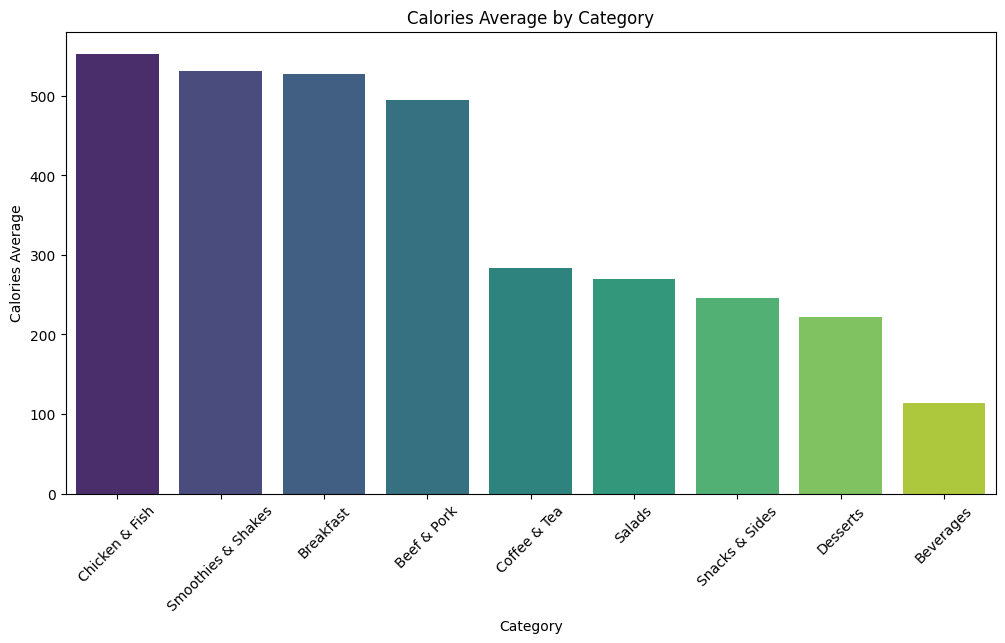

In [ ]:
# Studying the correlation between calories and its foods' categories using barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=calories_by_category.index, y=calories_by_category.values, hue=calories_by_category.index, palette='viridis', legend=False)
plt.title('Calories Average by Category')
plt.xlabel('Category')
plt.ylabel('Calories Average')
plt.xticks(rotation=45)
plt.show()

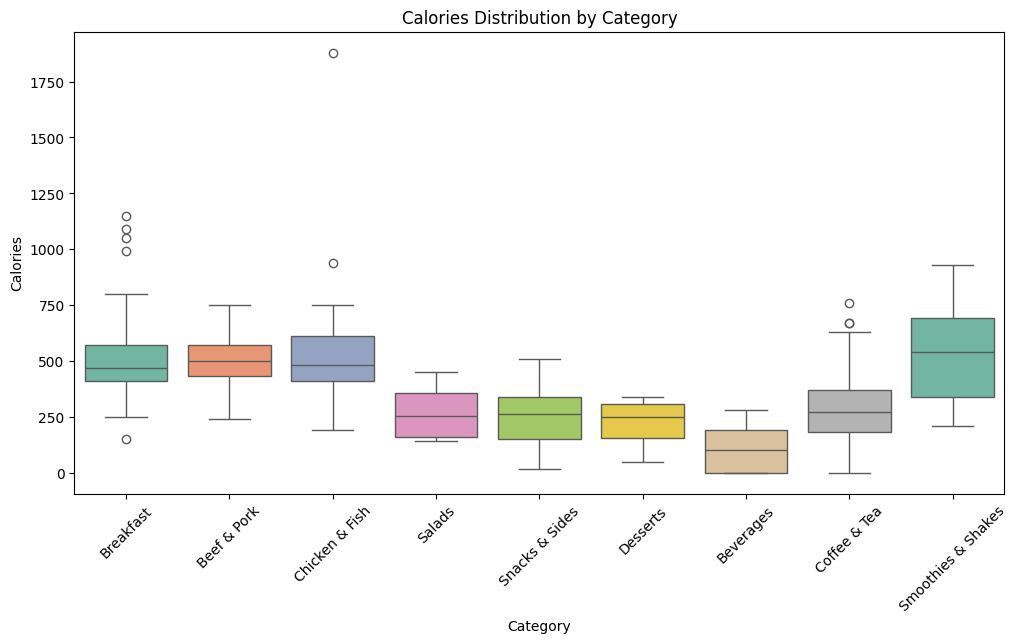

In [ ]:
# Studying the correlation between calories and its foods' categories using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Calories',hue='Category', data=df, palette='Set2', legend=False)
plt.title('Calories Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Calories')
plt.xticks(rotation=45)
plt.show()

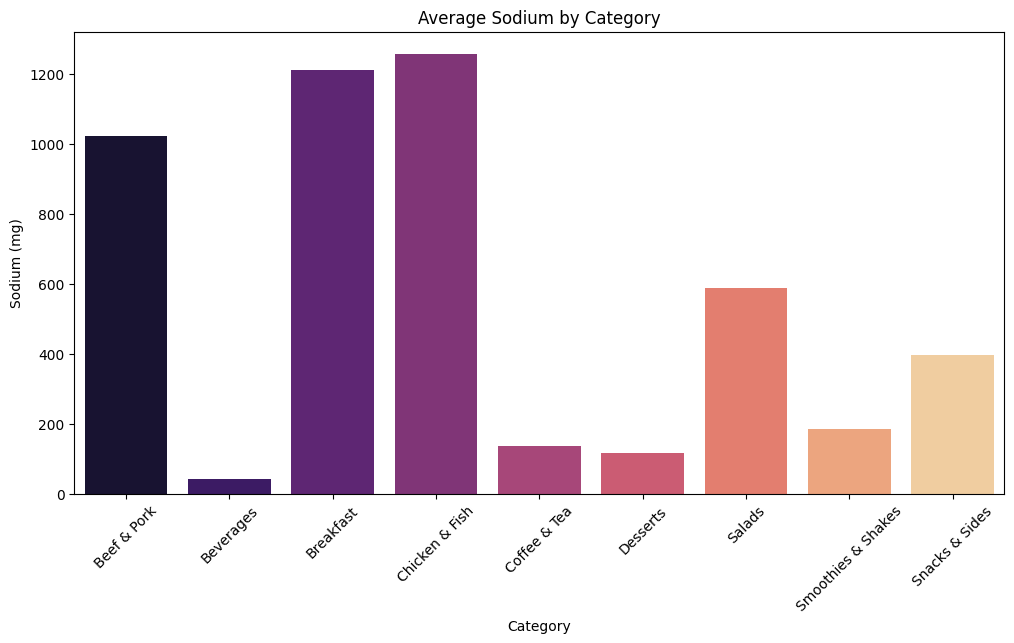

In [ ]:
# Analyzing the average sodium by its foods' categories
plt.figure(figsize=(12, 6))
sns.barplot(x=average_category.index, y=average_category['Sodium'], hue=average_category.index, palette='magma', legend=False)
plt.title('Average Sodium by Category')
plt.xlabel('Category')
plt.ylabel('Sodium (mg)')
plt.xticks(rotation=45)
plt.show()


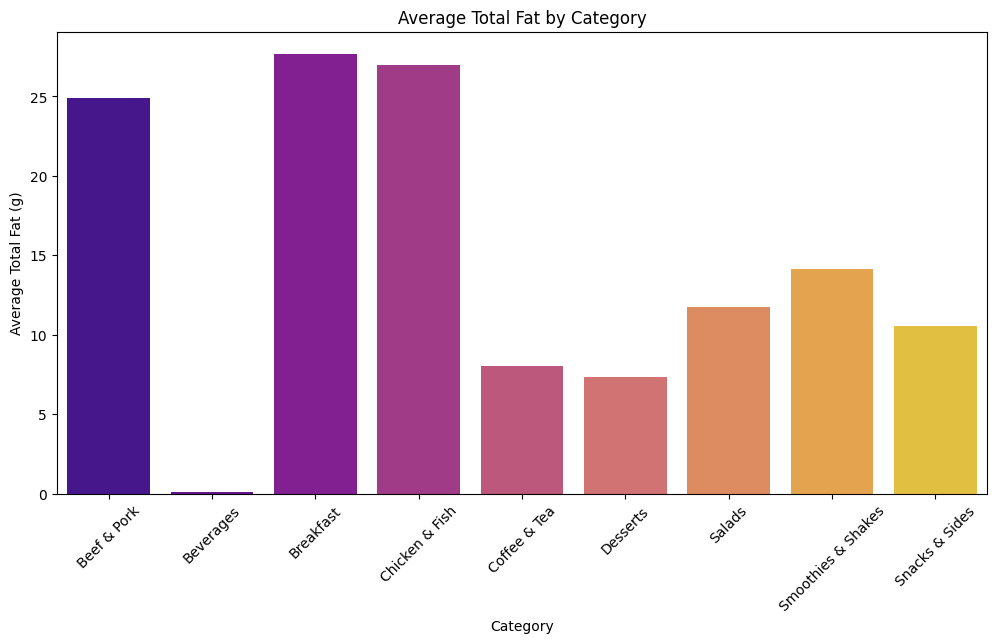

In [29]:
# Analyzing the average total fat by category in a barchart
plt.figure(figsize=(12, 6))
sns.barplot(x=average_category.index, y=average_category['Total Fat'], hue=average_category.index, palette='plasma', legend=False)
plt.title('Average Total Fat by Category')
plt.xlabel('Category')
plt.ylabel('Average Total Fat (g)')
plt.xticks(rotation=45)
plt.show()

# 3.Identifying the most and least healthy foods

In [38]:
df_filtered = df[df['Calories'] > 0]  # Filtering 0 values
df = df.dropna(subset=['Calories', 'Total Fat', 'Sodium', 'Sugars']) # Removing NaN items

# Calories
top_calorias = df_filtered.sort_values(by='Calories', ascending=False).head(10)
bottom_calorias = df_filtered.sort_values(by='Calories', ascending=True).head(10)

# Total Fat
top_gorduras = df_filtered.sort_values(by='Total Fat', ascending=False).head(10)
bottom_gorduras = df_filtered.sort_values(by='Total Fat', ascending=True).head(10)

# Sodium
top_sodio = df_filtered.sort_values(by='Sodium', ascending=False).head(10)
bottom_sodio = df_filtered.sort_values(by='Sodium', ascending=True).head(10)

# Sugars
top_acucares = df_filtered.sort_values(by='Sugars', ascending=False).head(10)
bottom_acucares = df_filtered.sort_values(by='Sugars', ascending=True).head(10)


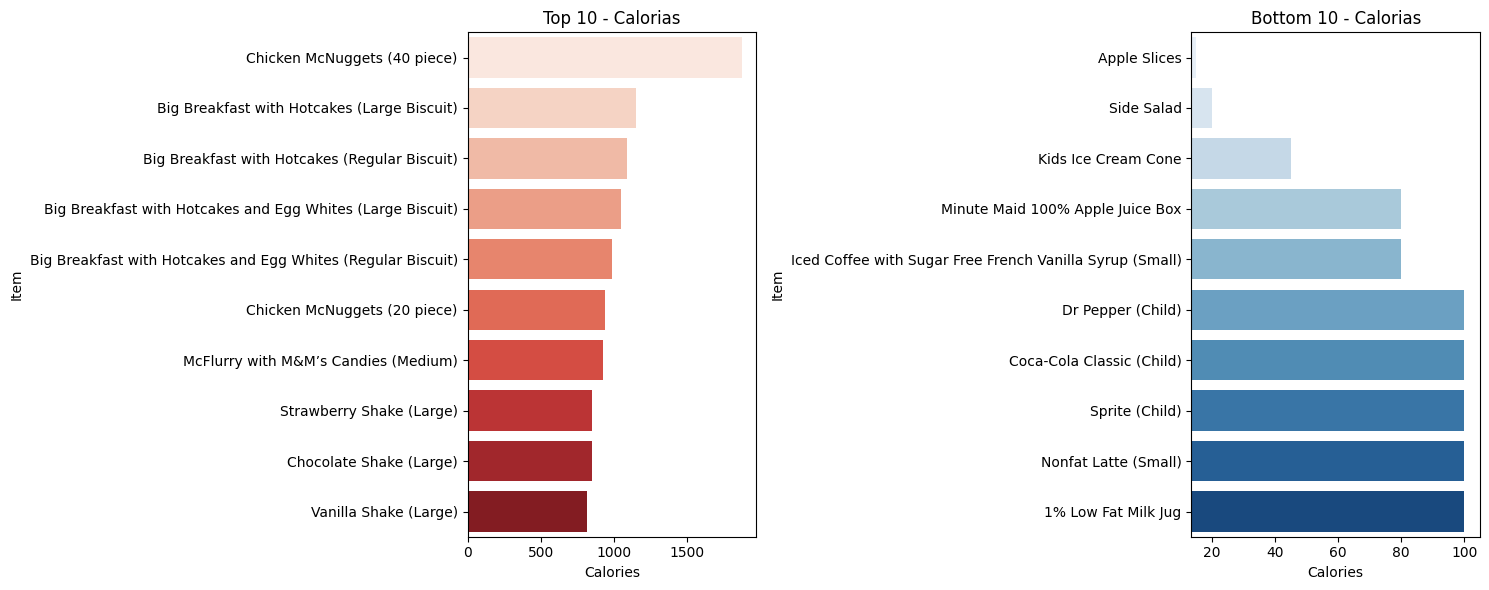

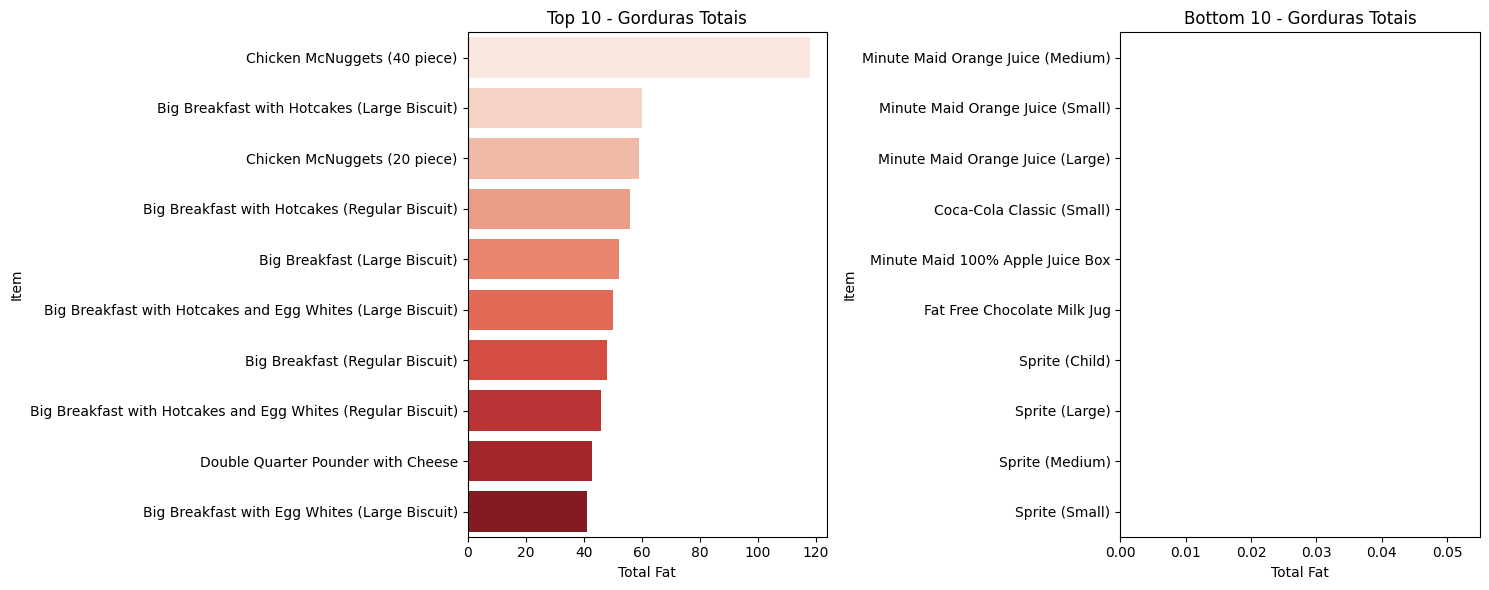

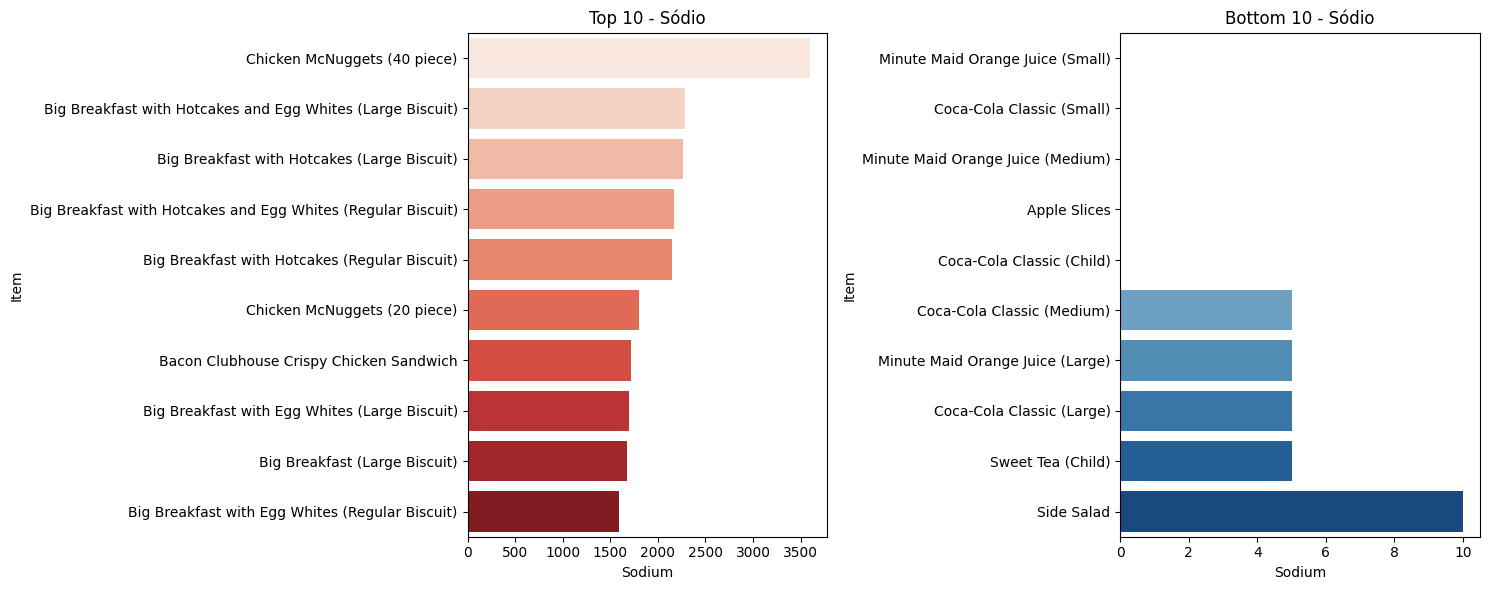

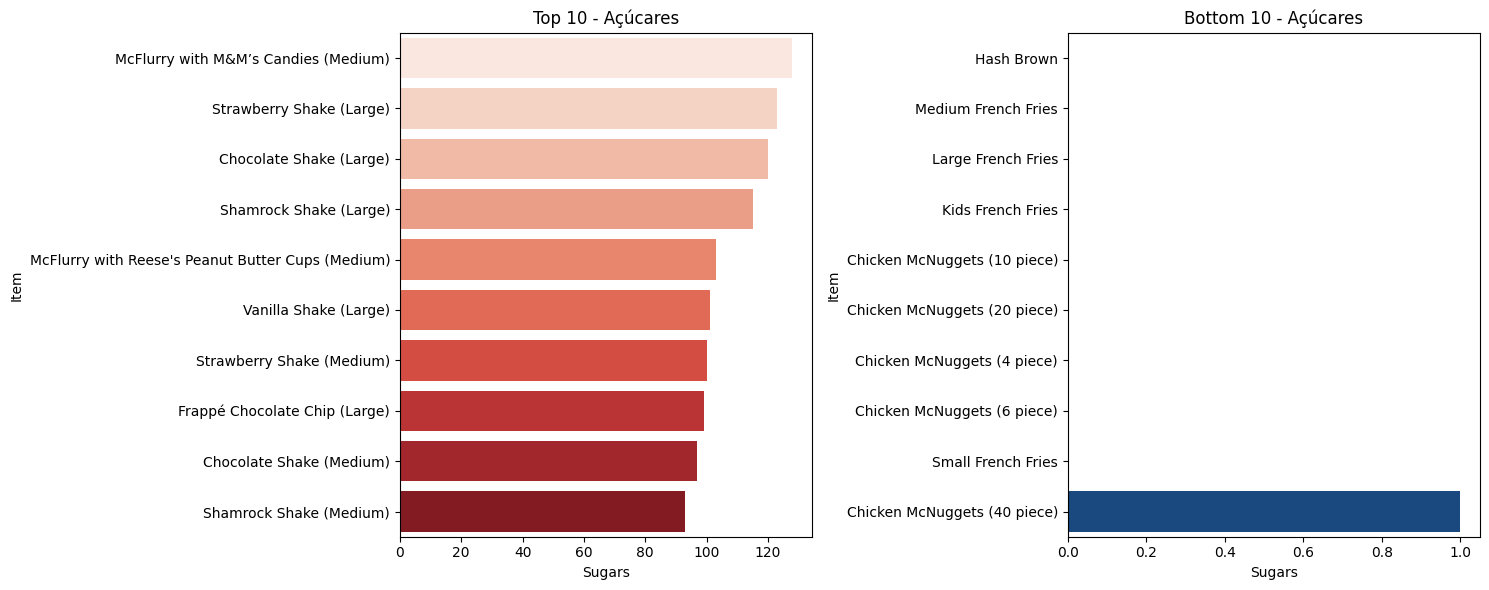

In [42]:
def plot_top_bottom(top, bottom, nutriente, titulo):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Top 10 Barplot
    sns.barplot(x=nutriente, y='Item', data=top, ax=axes[0], palette='Reds', hue='Item', legend=False)
    axes[0].set_title(f'Top 10 - {titulo}')
    axes[0].set_xlabel(nutriente)
    axes[0].set_ylabel('Item')
    
    # Bottom 10 Barplot
    sns.barplot(x=nutriente, y='Item', data=bottom, ax=axes[1], palette='Blues', hue='Item', legend=False)
    axes[1].set_title(f'Bottom 10 - {titulo}')
    axes[1].set_xlabel(nutriente)
    axes[1].set_ylabel('Item')
    
    # Adjusting the X scale so we can see smaller values
    min_value = bottom[nutriente].min()
    axes[1].set_xlim(left=min_value - 0.1 * min_value)  
    
    plt.tight_layout()
    plt.show()

# Rankings
plot_top_bottom(top_calorias, bottom_calorias, 'Calories', 'Calorias')
plot_top_bottom(top_gorduras, bottom_gorduras, 'Total Fat', 'Gorduras Totais')
plot_top_bottom(top_sodio, bottom_sodio, 'Sodium', 'Sódio')
plot_top_bottom(top_acucares, bottom_acucares, 'Sugars', 'Açúcares')

# 4. Correlation Analysis

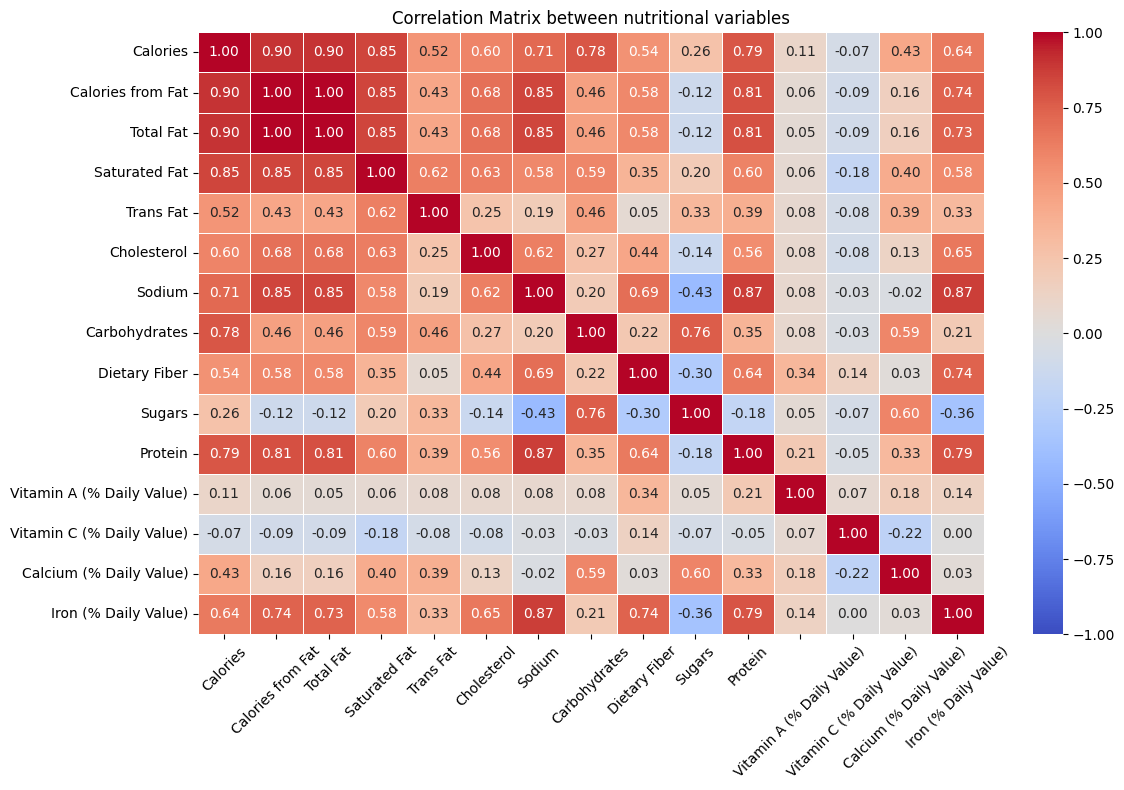

In [ ]:
#Correlation matrix between nutritional variables, finding patterns between them.

nutritional_columns = [
    'Calories', 'Calories from Fat', 'Total Fat', 'Saturated Fat', 'Trans Fat',
    'Cholesterol', 'Sodium', 'Carbohydrates', 'Dietary Fiber', 'Sugars', 'Protein',
    'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)',
    'Iron (% Daily Value)'
]

df_nutritional = df[nutritional_columns]
correlation_matrix = df_nutritional.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,  
    fmt=".2f",  
    cmap='coolwarm',  
    vmin=-1,  
    vmax=1,  
    linewidths=0.5  
)
plt.title('Correlation Matrix between nutritional variables')
plt.xticks(rotation=45)  
plt.yticks(rotation=0)  
plt.tight_layout()  
plt.show()

# 5.Daily Values(%) Analysis

In [ ]:
print("Available columns in the dataset:")
print(df.columns)

Available columns in the dataset:
Index(['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat',
       'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')


In [ ]:
sodium_dv_limit = 30  # 30% DV for sodium (690 mg)
total_fat_dv_limit = 30  # 30% DV for total fat (23.4 g)
carbs_dv_limit = 45 #45% for a 1500 calorie diet

high_sodium_items = df[df['Sodium (% Daily Value)'] >= sodium_dv_limit][['Item', 'Sodium (% Daily Value)']]
high_total_fat_items = df[df['Total Fat (% Daily Value)'] >= total_fat_dv_limit][['Item', 'Total Fat (% Daily Value)']]
high_carbs_items = df[df['Carbohydrates (% Daily Value)'] >= carbs_dv_limit][['Item', 'Carbohydrates (% Daily Value)']]

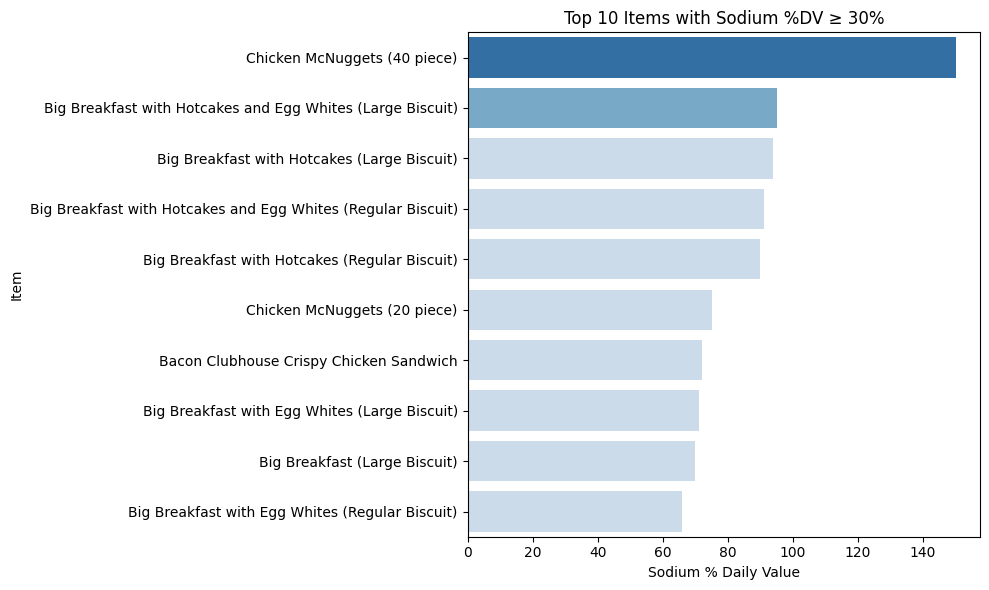

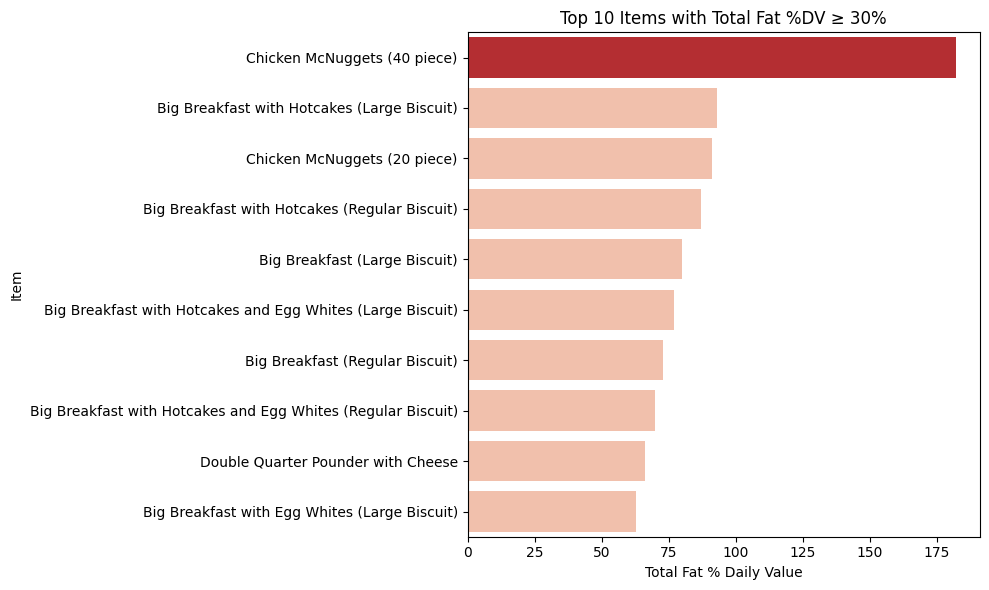

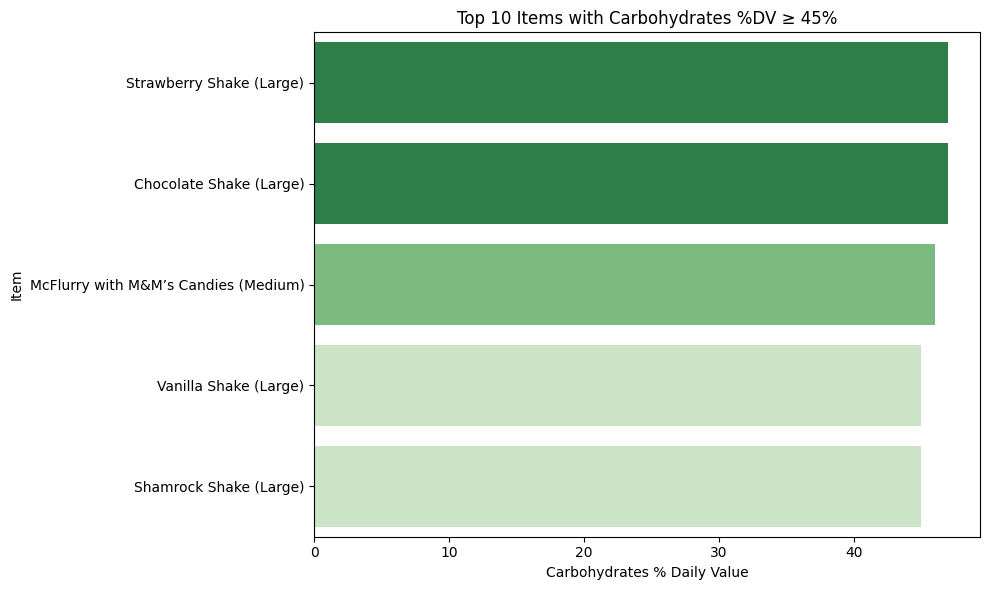

In [89]:
def plot_horizontal_barplot(data, x, y, title, xlabel, ylabel, palette, top_n=10):
    data_sorted = data.sort_values(by=x, ascending=False).head(top_n)
    
    data_sorted['Category'] = pd.cut(data_sorted[x], bins=3, labels=['Low', 'Medium', 'High'])
    
    plt.figure(figsize=(10, 6))  # Adjust figure size
    sns.barplot(
        x=x,
        y=y,
        data=data_sorted,
        palette=palette,
        orient='h',  
        hue='Category',  
        legend=False  
    )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()  # Adjust layout
    plt.show()

if not high_sodium_items.empty:
    plot_horizontal_barplot(
        data=high_sodium_items,
        x='Sodium (% Daily Value)',
        y='Item',
        title=f'Top 10 Items with Sodium %DV ≥ {sodium_dv_limit}%',
        xlabel='Sodium % Daily Value',
        ylabel='Item',
        palette='Blues',
    )
else:
    print("\nNo items found with sodium %DV above the limit.")

if not high_total_fat_items.empty:
    plot_horizontal_barplot(
        data=high_total_fat_items,
        x='Total Fat (% Daily Value)',
        y='Item',
        title=f'Top 10 Items with Total Fat %DV ≥ {total_fat_dv_limit}%',
        xlabel='Total Fat % Daily Value',
        ylabel='Item',
        palette='Reds',
    )
else:
    print("\nNo items found with total fat %DV above the limit.")

if not high_carbs_items.empty:
    plot_horizontal_barplot(
        data=high_carbs_items,
        x='Carbohydrates (% Daily Value)',
        y='Item',
        title=f'Top 10 Items with Carbohydrates %DV ≥ {carbs_dv_limit}%',
        xlabel='Carbohydrates % Daily Value',
        ylabel='Item',
        palette='Greens'
    )
else:
    print("\nNo items found with carbohydrates %DV above the limit.")

# 6. Health Score

In [95]:
criteria = {
    'Calories': {'weight': 3, 'direction': -1},  # The smaller, the better
    'Total Fat': {'weight': 2, 'direction': -1},  # The smaller, the better
    'Sodium': {'weight': 2, 'direction': -1},     # The smaller, the better
    'Dietary Fiber': {'weight': 3, 'direction': 1},  # The bigger, the better
    'Calcium (% Daily Value)': {'weight': 2, 'direction': 1},  # The bigger, the better
    'Iron (% Daily Value)': {'weight': 2, 'direction': 1}      # The bigger, the better
}

In [ ]:
def normalize(series, direction):
    if direction == -1:
        # The smaller the better (inverter a escala)
        return 1 - (series - series.min()) / (series.max() - series.min())
    else:
        # The bigger the better
        return (series - series.min()) / (series.max() - series.min())


for criterion, config in criteria.items():
    df[f'{criterion}_normalized'] = normalize(df[criterion], config['direction'])

The normalization is done to: Create a scale between 0 and 1, with 0 being the worst case scenario (non-healthy) and 1 being the best case scenario (healthy)

In [108]:
df['Health Score'] = 0
for criterion, config in criteria.items():
    df['Health Score'] += config['weight'] * df[f'{criterion}_normalized']

# 4. Classificar os itens
df['Health Classification'] = df['Health Score'].apply(lambda x: 'Saudável' if x >= 7 else 'Não saudável')

# 5. Exibir os resultados
print(df[['Item', 'Health Score', 'Health Classification']].sort_values(by='Health Score', ascending=False))

# 6. Salvar os resultados em um novo arquivo CSV (opcional)
df.to_csv('mcdonalds_with_health_score.csv', index=False)


                                             Item  Health Score  \
89   Premium Southwest Salad with Grilled Chicken     10.202434   
87      Premium Southwest Salad (without Chicken)     10.116991   
88    Premium Southwest Salad with Crispy Chicken      9.615383   
40                          Fruit & Maple Oatmeal      9.309120   
41      Fruit & Maple Oatmeal without Brown Sugar      9.267707   
..                                            ...           ...   
120                             Dr Pepper (Large)      6.519149   
228                        Frappé Caramel (Large)      6.467668   
80                   Chicken McNuggets (10 piece)      6.455811   
81                   Chicken McNuggets (20 piece)      5.400000   
82                   Chicken McNuggets (40 piece)      4.050000   

    Health Classification  
89               Saudável  
87               Saudável  
88               Saudável  
40               Saudável  
41               Saudável  
..                    ...  

# 7. Interactive Views

In [112]:
import dash
from dash import dcc, html, Input, Output, dash_table
import plotly.express as px

In [109]:
def get_health_explanation(row):
    if row['Health Classification'] == 'Não saudável':
        reasons = []
        if row['Calories'] > 500:
            reasons.append("alto teor de calorias")
        if row['Total Fat'] > 20:
            reasons.append("alto teor de gorduras totais")
        if row['Sodium'] > 800:
            reasons.append("alto teor de sódio")
        if row['Dietary Fiber'] < 5:
            reasons.append("baixo teor de fibras")
        return f"Não saudável: {', '.join(reasons)}"
    else:
        return "Saudável"

df['Health Explanation'] = df.apply(get_health_explanation, axis=1)

In [113]:
# Criar o aplicativo Dash
app = dash.Dash(__name__)

# Layout do dashboard
app.layout = html.Div([
    html.H1("Análise Nutricional do McDonald's", style={'textAlign': 'center'}),
    
    # Dropdown para selecionar a categoria
    html.Label("Selecione a Categoria:"),
    dcc.Dropdown(
        id='category-dropdown',
        options=[{'label': cat, 'value': cat} for cat in df['Category'].unique()],
        value=df['Category'].unique()[0],  # Valor inicial
        clearable=False
    ),
    
    # Slider para selecionar a faixa de calorias
    html.Label("Selecione a Faixa de Calorias:"),
    dcc.RangeSlider(
        id='calories-slider',
        min=df['Calories'].min(),
        max=df['Calories'].max(),
        step=10,
        marks={i: str(i) for i in range(0, int(df['Calories'].max()) + 1, 100)},
        value=[df['Calories'].min(), df['Calories'].max()]  # Valor inicial
    ),
    
    # Gráfico de barras interativo
    dcc.Graph(id='bar-plot'),
    
    # Gráfico de dispersão interativo
    dcc.Graph(id='scatter-plot'),
    
    # Tabela nutricional dos itens selecionados
    html.H3("Características Nutricionais dos Itens Selecionados"),
    dash_table.DataTable(
        id='nutrition-table',
        columns=[
            {'name': 'Item', 'id': 'Item'},
            {'name': 'Calorias', 'id': 'Calories'},
            {'name': 'Gorduras Totais (g)', 'id': 'Total Fat'},
            {'name': 'Sódio (mg)', 'id': 'Sodium'},
            {'name': 'Fibras (g)', 'id': 'Dietary Fiber'},
            {'name': 'Classificação de Saúde', 'id': 'Health Classification'},
            {'name': 'Explicação', 'id': 'Health Explanation'}
        ],
        style_table={'height': '300px', 'overflowY': 'auto'},
        style_header={'backgroundColor': 'lightgrey', 'fontWeight': 'bold'},
        style_cell={'textAlign': 'left'}
    )
])

In [114]:
# Callback para atualizar os gráficos e a tabela
@app.callback(
    [Output('bar-plot', 'figure'),
     Output('scatter-plot', 'figure'),
     Output('nutrition-table', 'data')],
    [Input('category-dropdown', 'value'),
     Input('calories-slider', 'value')]
)
def update_graphs(selected_category, calories_range):
    # Filtrar os dados com base na categoria e faixa de calorias
    filtered_df = df[(df['Category'] == selected_category) & 
                     (df['Calories'] >= calories_range[0]) & 
                     (df['Calories'] <= calories_range[1])]
    
    # Gráfico de barras: Top 10 itens por calorias (colorido por classificação de saúde)
    bar_fig = px.bar(
        filtered_df.sort_values(by='Calories', ascending=False).head(10),
        x='Calories',
        y='Item',
        color='Health Classification',  # Colorir por classificação de saúde
        title=f'Top 10 Itens em {selected_category} (Calorias)',
        labels={'Calories': 'Calorias', 'Item': 'Item', 'Health Classification': 'Classificação de Saúde'},
        orientation='h',
        color_discrete_map={'Saudável': 'green', 'Não saudável': 'red'}  # Cores personalizadas
    )
    
    # Gráfico de dispersão: Calorias vs. Gorduras Totais (colorido por classificação de saúde)
    scatter_fig = px.scatter(
        filtered_df,
        x='Calories',
        y='Total Fat',
        color='Health Classification',  # Colorir por classificação de saúde
        title=f'Calorias vs. Gorduras Totais em {selected_category}',
        labels={'Calories': 'Calorias', 'Total Fat': 'Gorduras Totais (g)', 'Health Classification': 'Classificação de Saúde'},
        hover_name='Item',
        color_discrete_map={'Saudável': 'green', 'Não saudável': 'red'}  # Cores personalizadas
    )
    
    # Dados para a tabela nutricional
    table_data = filtered_df[['Item', 'Calories', 'Total Fat', 'Sodium', 'Dietary Fiber', 'Health Classification', 'Health Explanation']].to_dict('records')
    
    return bar_fig, scatter_fig, table_data


In [115]:
# Rodar o aplicativo
if __name__ == '__main__':
    app.run_server(debug=True)